In [1]:
import json
import glob
import matplotlib.pyplot as plt

In [23]:
INFO_PATH = 'savedmodels/model_info/'

def plot_multiple(model_type: str, metric='loss'):
    def plot_history(history: dict, metric: str):
        assert type(history) is dict, 'history needs to be a dict'
        plt.plot(history[metric])
        plt.plot(history['val_{}'.format(metric)])
        plt.xlabel('epochs')
        plt.ylabel(metric)

    for file in glob.glob('{}_*.json'.format(INFO_PATH + model_type)):
        with open(file) as json_file:
            info = json.load(json_file)
            json_file.close()
        dropout, lr = info['dropout'], info['lr']
        if abs(lr-1e-4) > 1e-9: continue
        acc = info['val_accuracy'][-1]
        plt.figure()
        plt.title('Dropout={}  lr={}  accuracy={:.2f}'.format(dropout, lr, acc*100))
        plot_history(info, metric)
        plt.legend([metric, 'valid. {}'.format(metric)])

def plot_loss(model_type: str, metric='loss', specifik=None, train_loss=False):
    info_list = []
    for file in glob.glob('{}_*.json'.format(INFO_PATH + model_type)):
        with open(file) as json_file:
            info = json.load(json_file)
            json_file.close()
        dropout, lr = info['dropout'], info['lr']
        if specifik is not None: 
            if (dropout, lr) != specifik[0:2]: continue
        acc = info['val_accuracy'][-1]*100
        info_list.append((dropout, lr, acc))
        if train_loss: plt.plot(info[metric])
        plt.plot(info['val_'+metric])
        plt.xlabel('epochs')
        plt.ylabel(metric)

    plt.legend(['do={} | lr={} | acc={:.2f}'.format(*info_) for info_ in info_list])
    return max(info_list, key=lambda  x: x[-1])

def plot_loss2(model_type: str, metric='loss', specifik=None, train_loss=False):
    info_list = []
    for file in glob.glob('{}_*.json'.format(INFO_PATH + model_type.lower())):
        with open(file) as json_file:
            info = json.load(json_file)
            json_file.close()
        dropout, lr = info['dropout'], info['lr']
        if specifik is not None: 
            if (dropout, lr) != specifik[0:2]: continue
        acc = info['val_accuracy'][-1]*100
        info_list.append((dropout, lr, acc))
        if train_loss: plt.plot(info[metric])
        plt.plot(info['val_'+metric])
        plt.xlabel('epochs')
        plt.ylabel(metric)
        plt.title(model_type + ' loss during training')

    plt.legend(['Training loss', 'Development loss'])
    return max(info_list, key=lambda  x: x[-1])

def plot_best(best: list, metric='loss'):
    def _plot_loss(model_type: str, metric: str, target: tuple):
        for file in glob.glob('{}_*.json'.format(INFO_PATH + model_type)):
            with open(file) as json_file:
                info = json.load(json_file)
                json_file.close()

            dropout, lr = info['dropout'], info['lr']
            if (dropout, lr) != target[0:2]: continue

            acc = info['val_accuracy'][-1]
            plt.plot(info['val_'+metric])
            plt.xlabel('epochs')
            plt.ylabel(metric)
    
    model_types = ['RNN', 'LSTM', 'BiLSTM']
    for i, model_type in enumerate(model_types):
        _plot_loss(model_type.lower(), metric, best[i])
    plt.legend(['{}, acc={:.2f}'.format(model_types[idx], best[idx][-1]) for idx in range(0,3)])


# RNN

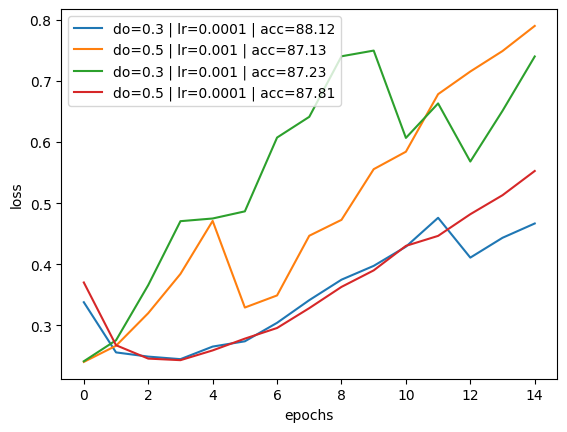

In [7]:
# plot_multiple('rnn', 'loss')
rnn_best = plot_loss('rnn')

# LSTM

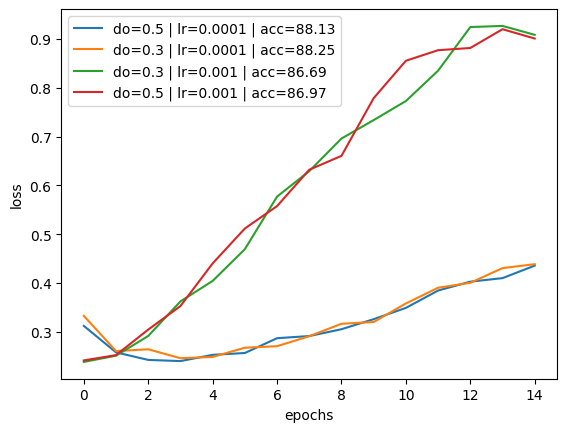

In [8]:
# plot_multiple('lstm', 'loss')
lstm_best = plot_loss('lstm')

# BiLSTM

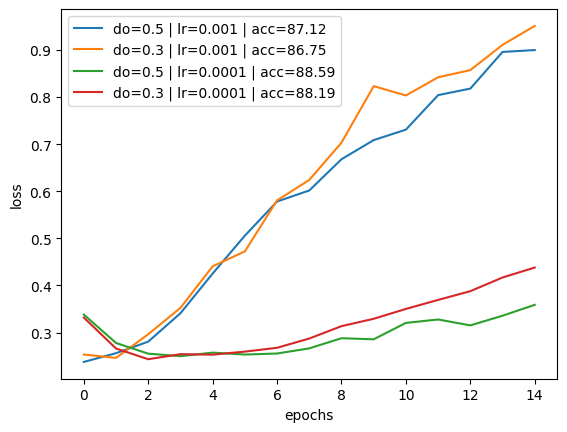

In [9]:
# plot_multiple('bilstm', 'loss')
bilstm_best = plot_loss('bilstm')

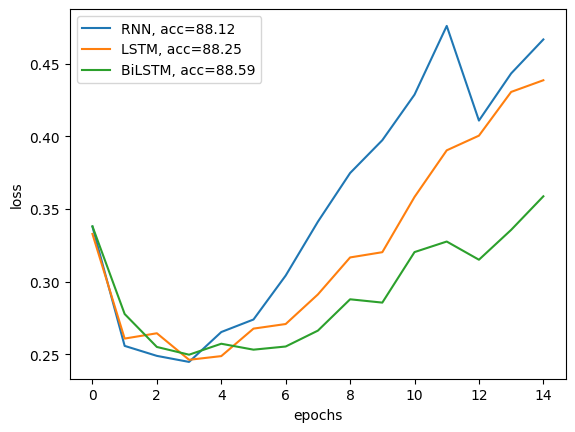

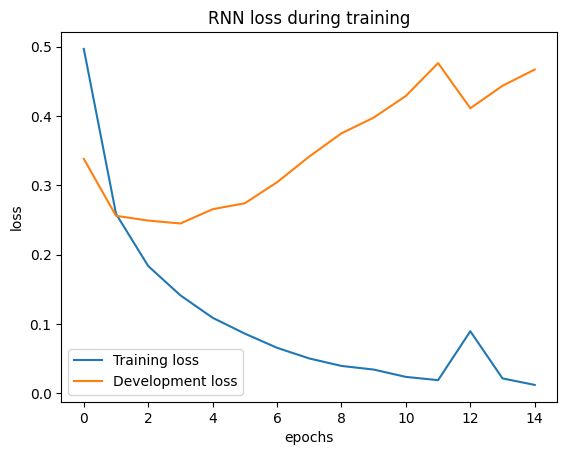

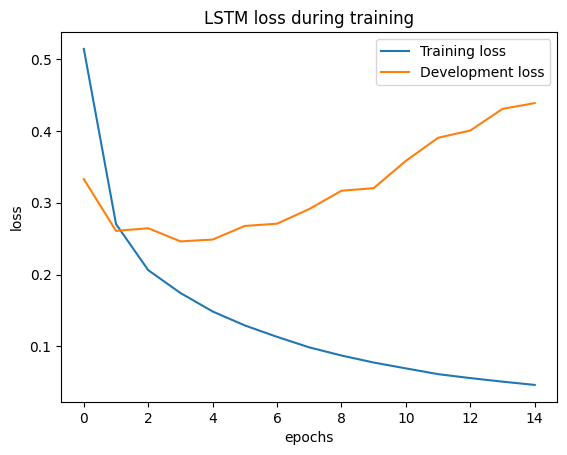

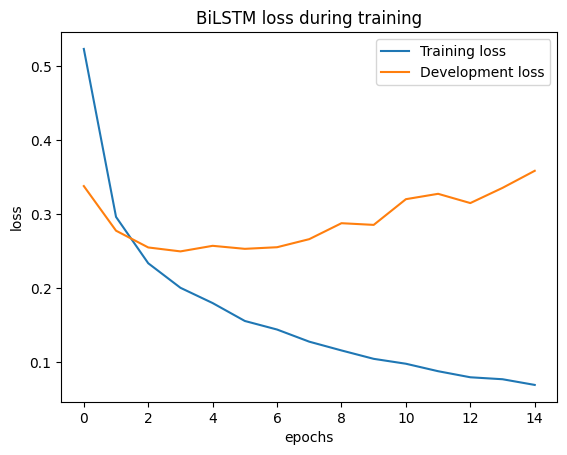

In [34]:
# plt.figure()
# plot_best([rnn_best, lstm_best,bilstm_best], 'accuracy')
plt.figure()
plot_best([rnn_best, lstm_best,bilstm_best], 'loss')

plt.figure()
plot_loss2(model_type='RNN', specifik=rnn_best, train_loss=True)
plt.savefig('figures/RNN_loss.png')
plt.figure()
plot_loss2(model_type='LSTM', specifik=lstm_best, train_loss=True)
plt.savefig('figures/LSTM_loss.png')
plt.figure()
plot_loss2(model_type='BiLSTM', specifik=bilstm_best, train_loss=True)
plt.savefig('figures/BiLSTM_loss.png')

# Get index of best models on dev data.

In [32]:
# Get index of model.
def index_getter(dropout, lr):
    i_do = 0 if dropout == 0.3 else 2
    i_lr = 0 if lr == 1e-3 else 1
    return i_do + i_lr

rnn_i = index_getter(*rnn_best[0:2])
lstm_i = index_getter(*lstm_best[0:2])
bilstm_i = index_getter(*bilstm_best[0:2])

print('RNN: {}'.format(rnn_i),
      'LSTM: {}'.format(lstm_i),
      'BiLSTM: {}'.format(bilstm_i),
       sep='\n')


RNN: 1
LSTM: 1
BiLSTM: 3
